<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/EYDAP_Challenge_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Προβλέψεις χρονοσειρών**


# **Περιεχόμενα**



Εισαγωγή

Ορισμός του προβλήματος

Συλλογή δεδομένων 

Προεπεξεργασία δεδομένων

Χρονολογική σειρά και ισοδύναμες χρονικές Timestamps

Χειρισμός Missing Values

Δειγματοληψία

Stationarity

Feature Engineering

Χαρακτηριστικά χρόνου

Αποσύνθεση

Καθυστέρηση

Διερευνητική ανάλυση Δεδομένων

Ανάλυση Αυτοσυσχέτισης

Cross Validation

Μοντέλα

Μοντέλα για Univariate Time Series

Naive προσέγγιση

Κινητός μέσος όρος 

Εκθετική εξομάλυνση (IN WORK)

ARIMA

Μοντέλα για Multivariate Time Series

Vector Autoregression (VAR)


# **Εισαγωγή**



Η ΕΥΔΑΠ, η μεγαλύτερη εταιρεία ύδρευσης και αποχέτευσης στην Ελλάδα, διαχειρίζεται ένα πολύπλοκο σύστημα υδροδότησης που ξεκινά από τους ταμιευτήρες νερού και συνεχίζει στις Μονάδες Επεξεργασίας Νερού, έως και τα υδρόμετρα που υδρεύουν μεγάλο πλήθος νοικοκυριών (περίπου 2,2 εκατομμύρια).
Ταυτόχρονα, για την εξυπηρέτηση των σκοπών της, η ΕΥΔΑΠ συγκεντρώνει καθημερινά περίπου
30.000 μετρήσεις κατανάλωσης νερού, σε επίπεδο τριμήνου, σε όλη την Αττική.
Οι μετρήσεις αυτές αποτελούν ένα σχετικά τυχαίο δείγμα της συνολικής κατανάλωσης από τις

2,2 εκατομμύρια παροχές καταναλωτών σε σχετικά τυχαία χρονικά διαστήματα, δεδομένου ότι τα τρίμηνα δεν συμπίπτουν από μετρητή σε μετρητή και από περιοχή σε περιοχή.

Το μεγάλο πλήθος των παροχών καθιστά δύσκολη τη συστηματική παρακολούθηση της λειτουργίας των μετρητών, με αποτέλεσμα σε πολλές περιπτώσεις να μην είναι εφικτός ο έγκαιρος εντοπισμός μιας βλάβης, η οποία θα μπορούσε να είναι ενδεικτική για εκτεταμένες βλάβες στο δίκτυο και άσκοπης σπατάλης νερού. Ο περιορισμός αυτού του φαινομένου αποτελεί προτεραιότητα για την Εταιρεία, για οικονομικούς και περιβαλλοντικούς λόγους.

Η ικανοποιητική προσέγγιση της μελλοντικής κατανάλωσης μπορεί να επιτρέψει στην εταιρεία να εκδίδει ενδιάμεσους λογαριασμούς ή να δέχεται τα στοιχεία που περιοδικά θα προσφέρουν οι ίδιοι οι καταναλωτές. Με τον τρόπο αυτό, μπορεί να βελτιωθεί η λειτουργική αποτελεσματικότητα της εταιρείας, τόσο από την ενδιάμεση έκδοση λογαριασμών, μειώνοντας τον χρόνο πληρωμής, όσο και μειώνοντας το ίδιο το κόστος καταμέτρησης.
Σκοπός του διαγωνισμού αυτού είναι η ανάπτυξη μηχανισμών οι οποίοι θα αναγνωρίζουν πιθανά μοτίβα κατανάλωσης και θα υλοποιούν μοντέλα πρόβλεψης και ανίχνευσης αποκλίνουσας συμπεριφοράς. Τα εργαλεία αυτά θα βασιστούν σε ένα πλήθος παραμέτρων σχετικές με το ιστορικό των μετρήσεων, το είδος του μετρητή, την ημερομηνία εγκατάστασης, την κατανάλωση της παροχής και άλλα χαρακτηριστικά του περιβάλλοντος.



Οι χρονοσειρές είναι μια συλλογή από  δεδομένα που εξαρτώνται από το χρόνο. Αυτό σημαίνει ότι κάθε σημείο δεδομένων έχει αντιστοιχιστεί σε μια συγκεκριμένη χρονική σήμανση. Στην ιδανική περίπτωση, αυτά τα σημεία δεδομένων είναι σε χρονολογική σειρά και σε χρονικά διαστήματα (π.χ. κάθε λεπτό ή καθημερινά). Το πρόβλημα πρόβλεψης χρονοσειρών αναλύει μοτίβα των προηγούμενων δεδομένων για να κάνει προβλέψεις για το μέλλον. Το πιο δημοφιλές παράδειγμα είναι πιθανώς η πρόβλεψη των τιμών των μετοχών. Άλλα παραδείγματα είναι οι πωλήσεις εποχιακών ενδυμάτων ή προγνώσεων καιρού. Σε αντίθεση με τα προβλήματα παλινδρόμησης, οι χρονοσειρές εξαρτώνται από το χρόνο και δείχνουν συγκεκριμένα χαρακτηριστικά, όπως η τάση και η εποχικότητα.

# **Ορισμός του προβλήματος**

Η ΕΥΔΑΠ, σε συνεργασία με το Δίκτυο Καινοτομίας της ΕΕΣΥΠ και το MITEF Greece, στα πλαίσια του «incentive prize competition» με σκοπό να  δώσει καινοτόμες λύσεις στις ακόλουθες δύο προκλήσεις:

1.Να δημιουργηθεί ένας αλγόριθμος ο οποίος, με τη βοήθεια ιστορικών δεδομένων μετρήσεων, να προβλέπει ποιοι μετρητές κατανάλωσης ύδατος είναι ελαττωματικοί;

2.Να δημιουργηθεί ένας αλγόριθμος ο οποίος, με τη βοήθεια ιστορικών δεδομένων μετρήσεων, να προβλέπει τη μελλοντική κατανάλωση μιας παροχής σε μεσοπρόθεσμο ορίζοντα, π.χ. 12 μήνες;

Οι προβλέψεις θα βασίζονται σε ένα πλήθος παραμέτρων σχετικές με το ιστορικό των μετρήσεων, το είδος του μετρητή, την ημερομηνία και τη γεωγραφική θέση της εγκατάστασης, αλλά και δεδομένα τρίτων πηγών. Ένα έξυπνο μοντέλο λειτουργίας των μετρητών μπορεί να συνεισφέρει ουσιαστικά στον έγκαιρο και αποτελεσματικό εντοπισμό βλαβών και, κατά συνέπεια, στη μείωση της σπατάλης νερού. Επιπλέον, η πρόβλεψη της κατανάλωσης μιας παροχής μπορεί να βελτιώσει την αποδοτικότητα της επιχείρησης.

# **Συλλογή δεδομένων**


Σχετικά με την πρώτη πρόκληση, ο αλγόριθμος που θα προκύψει θα πρέπει να είναι σε θέση να κατατάξει ένα σύνολο δεδομένων που αφορούν ένα μετρητή σε μία από τις δύο κλάσεις:
ορθή ή ελαττωματική λειτουργία.

Δεν υπάρχει ground truth, επομένως πρέπει να εξαχθούν συμπεράσματα για το ποια είναι ορθή και ποια αποκλίνουσα συμπεριφορά, με βάση τα δεδομένα.
Σχετικά με τη δεύτερη πρόκληση, ο αλγόριθμος που θα προκύψει θα πρέπει να είναι σε θέση να δώσει μια εκτίμηση κατανάλωσης για συγκεκριμένες μελλοντικές περιόδους, πχ τριμηνιαίες καταναλώσεις προσεχούς έτους.

01 _Για το διαγωνισμό αναφορικά με την εύρεση των ελαττωματικών μετρητών, θα δοθούν:

a _Χαρακτηριστικά των μετρητών, όπως ο αριθμός μετρητή, ο αριθμός παροχής του μετρητή, η ημερομηνία εγκατάστασης, το έτος κατασκευής. (Α1)

b _Στοιχεία δοκιμών των μετρητών για διάφορες ροές, η ημερομηνία απόσυρσης του μετρητή με την αντίστοιχη τιμή ένδειξης. (Α2-αιτήματα πελάτη, Α3-δειγματοληπτική αντικατάσταση)

c _Καταμετρήσεις έως και 10 προγενέστερων ετών των μετρητών αυτών μέχρι τη στιγμή της απόσυρσης. (Α4)

d _Γενικά στοιχεία θραύσεων αγωγών για τις εγγύς περιοχές των μετρητών. (Α5)
e _Γεωγραφικές συντεταγμένες της θέσης των μετρητών. (AB)

Οι γεωγραφικές συντεταγμένες που παρέχονται έχουν υποβληθεί σε επεξεργασία και δίνονται με σταθερή μετατόπιση.


02 _Για το διαγωνισμό αναφορικά με την πρόβλεψη κατανάλωσης:

a _Καταμετρήσεις των παροχών των 10 τελευταίων ετών, έως και το έτος 2018. (Β1)

b _Στοιχεία μεταβολών που αφορούν τις παροχές (κατάσταση παροχής και αλλαγές ιδιοκτήτη ή ενοίκου). (Β2) 

Τα δεδομένα χρονοσειρών ειναι σε μορφή πίνακα ( αρχεία csv).


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/527163_ΟΗ_Μ.csv")


# Simplify column names
df.columns = ['timestamp', 'provision_id', 'meter_id', 'indication','meter_var_normal', 'meter_var_stop', 'provision_var_change','provision_var_normal']

targets = ['indication']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,timestamp,provision_id,meter_id,indication,meter_var_normal,meter_var_stop,provision_var_change,provision_var_normal
0,15-03-01,527163,A86P05630,18406,1,0,0,1
1,15-04-01,527163,A86P05630,18831,1,0,0,1
2,15-05-01,527163,A86P05630,19161,1,0,0,1
3,15-06-01,527163,A86P05630,19541,1,0,0,1
4,15-07-01,527163,A86P05630,19906,1,0,0,1


In [43]:
df.tail()

,timestamp,provision_id,meter_id,indication,meter_var_normal,meter_var_stop,provision_var_change,provision_var_normal,indication_log,indication_diff_1,indication_diff_2,year,month,day,day_of_year,week_of_year,quarter,season,month_sin,month_cos,day_sin,day_cos,day_of_year_sin,day_of_year_cos,week_of_year_sin,week_of_year_cos,quarter_sin,quarter_cos,season_sin,season_cos,indication_trend,indication_seasonal,indication_seasonal_shift_r_2M,indication_seasonal_shift_r_1M,indication_seasonal_shift_1M,indication_seasonal_shift_2M,indication_seasonal_shift_3M,quarter_idx
230,2020-05-15,527163,A18P39372,1657.0,1,0,0,1,7.412764,210.0,-7.0,2020,5,15,136,20,2,2,5.000000e-01,-8.660254e-01,5.665539e-16,-1.0,0.717677,-0.696376,0.668065,-0.744103,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00,1646.666667,417.733636,NaN,-416.176674,-1.556962,-416.176674,417.733636,78
231,2020-06-15,527163,A18P39372,1836.0,1,0,0,1,7.515345,179.0,-31.0,2020,6,15,167,25,2,3,1.224647e-16,-1.000000e+00,5.665539e-16,-1.0,0.263665,-0.964614,0.128751,-0.991677,1.224647e-16,-1.000000e+00,-1.000000e+00,-1.836970e-16,1840.666667,-416.176674,NaN,NaN,417.733636,-1.556962,-416.176674,78
232,2020-07-15,527163,A18P39372,2029.0,1,0,0,1,7.615298,193.0,14.0,2020,7,15,197,29,3,3,-5.000000e-01,-8.660254e-01,5.665539e-16,-1.0,-0.247022,-0.969010,-0.345610,-0.938378,-1.000000e+00,-1.836970e-16,-1.000000e+00,-1.836970e-16,2020.666667,-1.556962,NaN,NaN,-416.176674,417.733636,-1.556962,79
233,2020-08-15,527163,A18P39372,2197.0,1,0,0,1,7.694848,168.0,-25.0,2020,8,15,228,33,3,3,-8.660254e-01,-5.000000e-01,5.665539e-16,-1.0,-0.705584,-0.708627,-0.741220,-0.671262,-1.000000e+00,-1.836970e-16,-1.000000e+00,-1.836970e-16,2193.333333,417.733636,NaN,NaN,-1.556962,-416.176674,417.733636,79
234,2020-09-15,527163,A18P39372,2354.0,1,0,0,1,7.763871,157.0,-11.0,2020,9,15,259,38,3,4,-1.000000e+00,-1.836970e-16,5.665539e-16,-1.0,-0.967938,-0.251190,-0.991114,-0.133018,-1.000000e+00,-1.836970e-16,-2.449294e-16,1.000000e+00,2397.000000,-416.176674,NaN,NaN,417.733636,-1.556962,-416.176674,79


# Προεπεξεργασία δεδομένων

Δεδομένου ότι εργαζόμαστε με χρονοσειρές, τα πιο βασικά χαρακτηριστικά είναι η λειτουργία που σχετίζεται με το χρόνο. Στην περιπτωση μας ,ενώ έχουμε τη στήλη Ημερομηνία που προσδιορίζει τον χρόνο ,οι χρονικές σφραγίδες δεν είναι ισοδύναμες  χρονοσειρές.Eπίσης υπάρχουν κάποιες κατηγοριες δεδομένων οι οποίες ειναι τύπου categorical.  Επομένως,  τα πρόσθετα βήμα προετοιμασίας δεδομένων που απαιτούνται ειναι οι χρονοσειρές να είναι ισοδύναμες και τα δεδομένα categorical να ελεγθούν ως προς την σημαντικότητας του και να μετατραπούν έτσι ώστε να ενσωματωθούν στο αλγόριθμο 

In [45]:
#column 'timestamp' is provided in string format. Convert it to the datetime64[ns] data type.
from datetime import datetime, date 

df['timestamp'] = pd.to_datetime(df.timestamp, format = '%d-%m-%y')


Χαρακτηριστικά:

provision_id   είναι ο αριθμός παροχής του κτηρίου

meter_id  είναι ο αριθμός μετρητή του κτηρίου

meter_var_normal είναι η ένδειξη οτι ο μετρητη λειτουργει κανονικά 

meter_var_stop είναι η ένδειξη ότι ο μετρητής έχει γίνει διακοπή

provision_var_change είναι η ένδειξη οτι στην παροχή έχει γίνει κάποια μεταβολή

provision_var_normal είναι η ένδειξη όλτι η παροχή λειτουργεί κανονικά


Στόχος:

indication είναι η ένδειξη του μετρητή που δείχνει τη κατανάλωση νερού σε κμ3

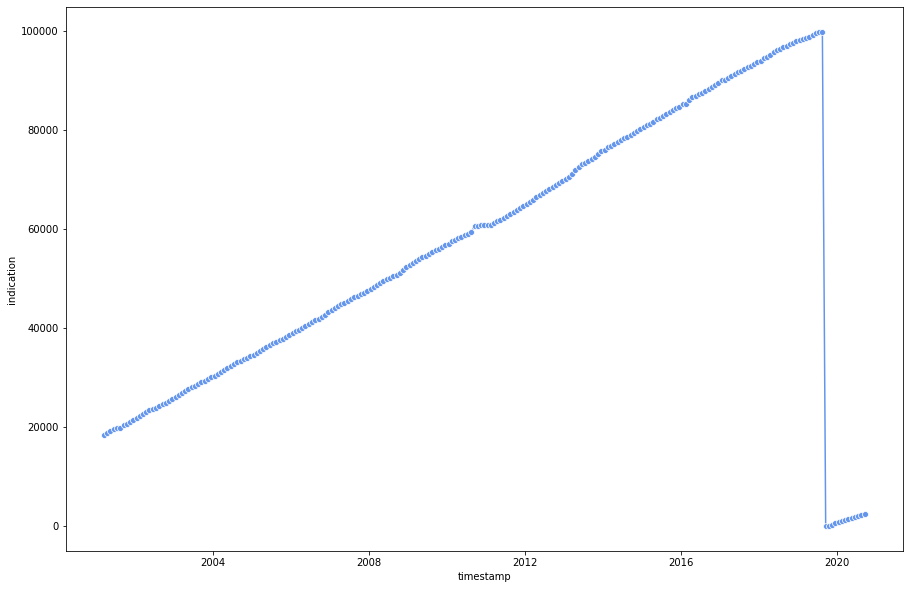

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sns.lineplot(x=df.timestamp, y=df.indication, ax=ax, color='cornflowerblue', marker='o')

plt.show()

In [47]:
# Sort values by timestamp (not necessary in this case)
df = df.sort_values(by='timestamp')

# Check time intervals
df['Time_Interval'] = df.timestamp - df.timestamp.shift(1)

df[['timestamp', 'Time_Interval']].head()

,timestamp,Time_Interval
0,2001-03-15,NaT
1,2001-04-15,31 days
2,2001-05-15,30 days
3,2001-06-15,31 days
4,2001-07-15,30 days


In [48]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

31 days    137
30 days     78
28 days     14
29 days      5
Name: Time_Interval, dtype: int64


# Χειρισμός Missing Values


Στην περίπτωση μας δεν έχουμε missing values

Στην περίπτωση που ειχαμε

Επιλογή 1: Συμπληρώστε το NaN με Outlier ή Zero

Σε αυτό το συγκεκριμένο παράδειγμα η συμπλήρωση της τιμής που λείπει με μια ακραία τιμή όπως το -999 δεν είναι καλή ιδέα. Ωστόσο, πολλοί φορητοί υπολογιστές σε αυτήν την πρόκληση χρησιμοποιούν -999.

Επιλογή 2: Συμπληρώστε NaN με μέση τιμή

Επίσης σε αυτό το παράδειγμα, μπορούμε να δούμε ότι η πλήρωση NaNs με τη μέση τιμή επίσης δεν επαρκεί.

Επιλογή 3: Συμπληρώστε το NaN με την τελευταία τιμή με .ffill ()

Η συμπλήρωση NaN με την τελευταία τιμή είναι ήδη λίγο καλύτερη σε αυτήν την περίπτωση.

Επιλογή 4: Συμπληρώστε το NaN με τιμή γραμμικής παρεμβολής με .interpolate ()

Η συμπλήρωση NaN με τις παρεμβαλλόμενες τιμές είναι η καλύτερη επιλογή σε αυτό το μικρό παράδειγμα, αλλά απαιτεί γνώση των γειτονικών τιμών.

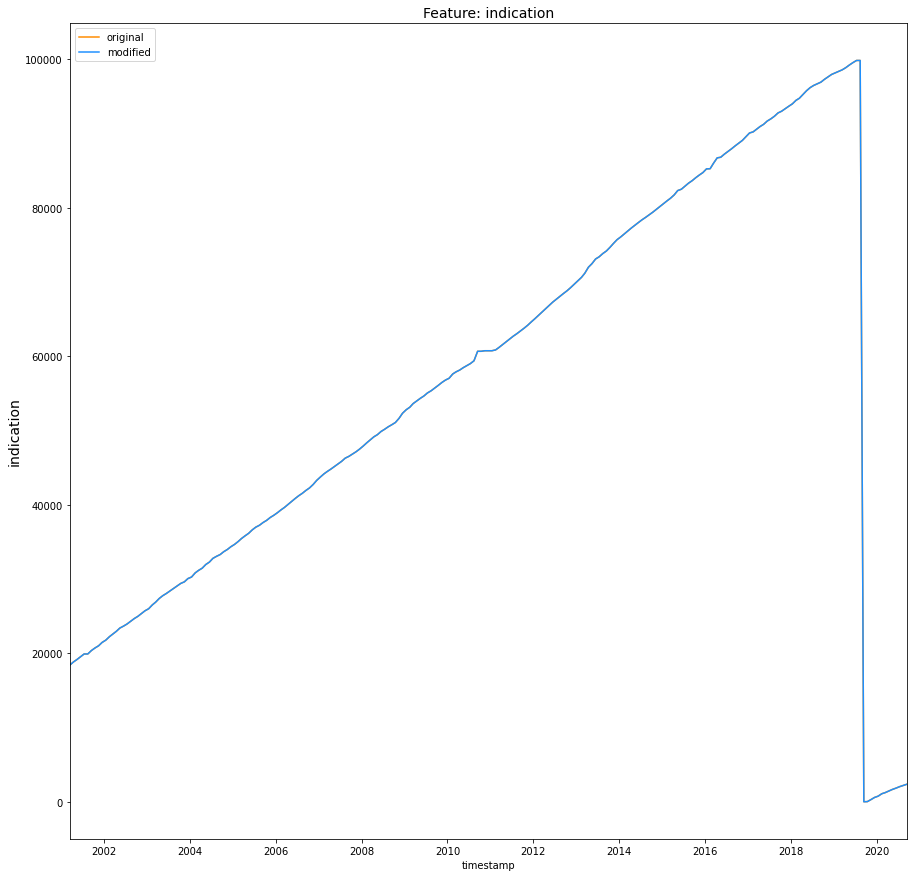

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
old = df.indication.copy()
df['indication'] = np.where((df.indication == 0),np.nan, df.indication)

sns.lineplot(x=df.timestamp, y=old.fillna(np.inf), ax=ax, color='darkorange', label = 'original')
sns.lineplot(x=df.timestamp, y=df.indication.fillna(np.inf), ax=ax, color='dodgerblue', label = 'modified')
ax.set_title('Feature: indication', fontsize=14)
ax.set_ylabel(ylabel='indication', fontsize=14)
ax.set_xlim([date(2001, 3, 15), date(2020, 9, 15)])

plt.show()

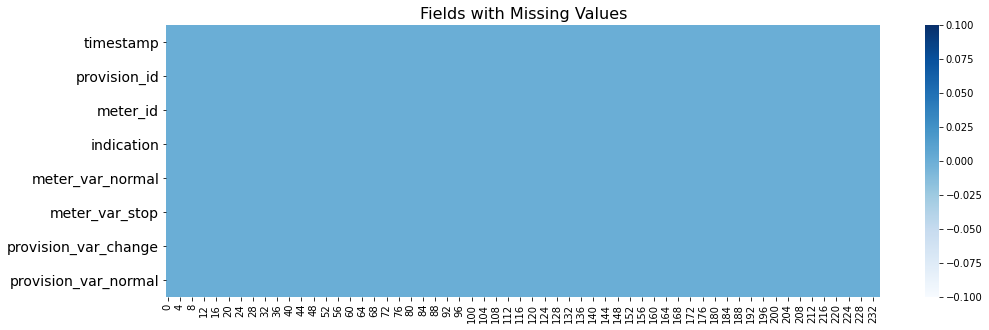

In [8]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

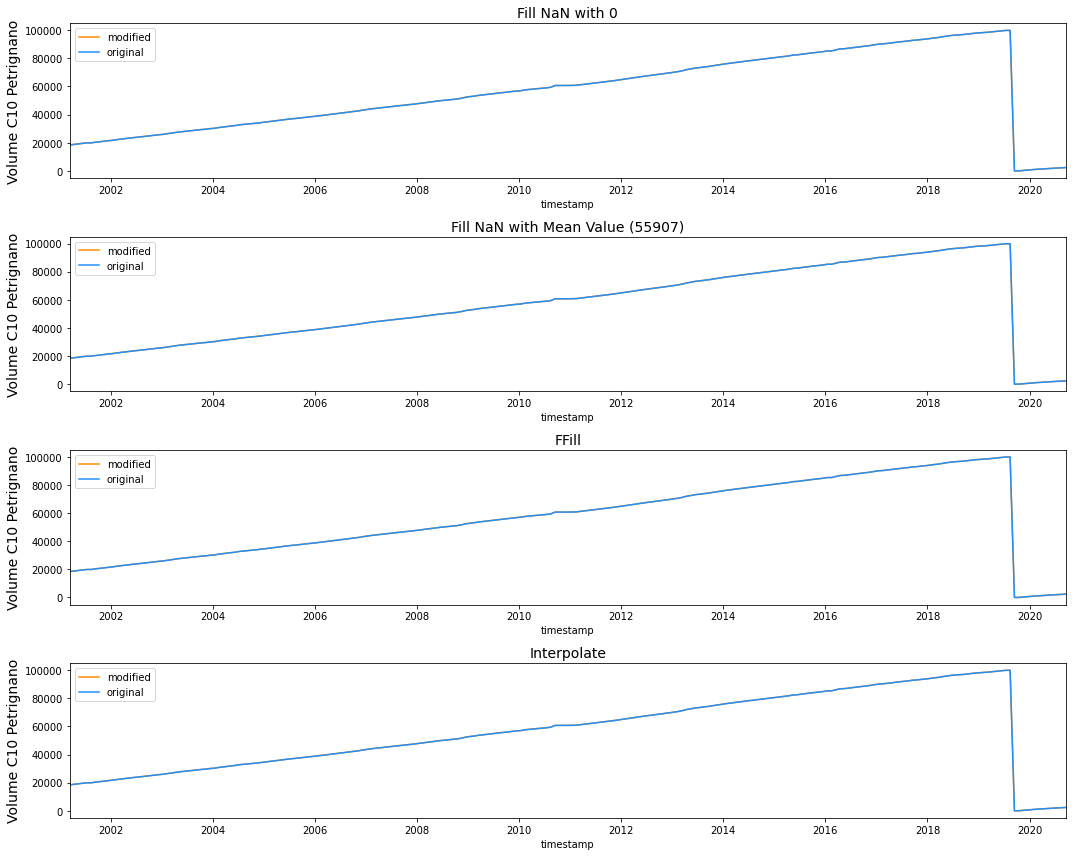

In [9]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.timestamp, y=df.indication.fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_val = df.indication.mean()
sns.lineplot(x=df.timestamp, y=df.indication.fillna(mean_val), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_val:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df.timestamp, y=df.indication.ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication.fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df.timestamp, y=df.indication.interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df.timestamp, y=df.indication.fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2001, 3, 15), date(2020, 9, 15)])
plt.tight_layout()
plt.show()

# Δειγματοληψία

Η δειγματοληψία μπορεί να παρέχει πρόσθετες πληροφορίες σχετικά με τα δεδομένα. Υπάρχουν δύο τύποι δειγματοληψίας:

Η δειγματοληψία είναι όταν αυξάνεται η συχνότητα των δειγμάτων (π.χ. ημέρες σε ώρες)
Η δειγματοληψία είναι όταν η συχνότητα των δειγμάτων μειώνεται (π.χ. ημέρες σε εβδομάδες)
Στην περίπτωση μας  θα κάνουμε κάποια δειγματοληψία με τη συνάρτηση .resample ()

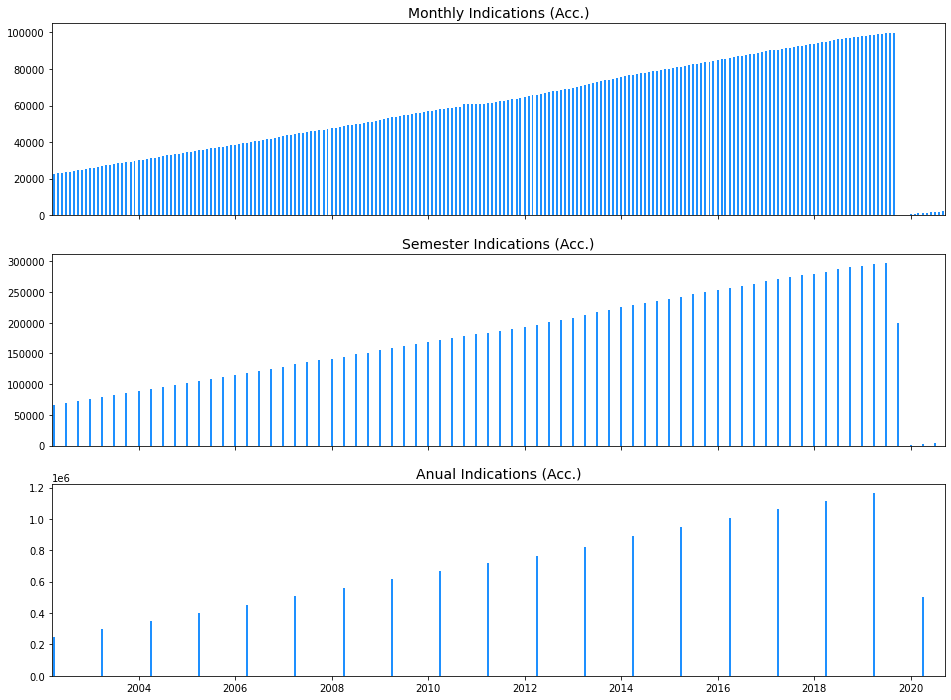

In [49]:
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,12))

resampled_df = df[['timestamp','indication']].resample('M', on='timestamp').sum().reset_index(drop=False)
ax[0].bar(resampled_df.timestamp, resampled_df.indication, width=15, color='dodgerblue')
ax[0].set_title('Monthly Indications (Acc.)', fontsize=14)

resampled_df = df[['timestamp','indication']].resample('3M', on='timestamp').sum().reset_index(drop=False)
ax[1].bar(resampled_df.timestamp, resampled_df.indication, width=15, color='dodgerblue')
ax[1].set_title('Semester Indications (Acc.)', fontsize=14)

resampled_df = df[['timestamp','indication']].resample('12M', on='timestamp').sum().reset_index(drop=False)
ax[2].bar(resampled_df.timestamp, resampled_df.indication, width=15, color='dodgerblue')
ax[2].set_title('Anual Indications (Acc.)', fontsize=14)

for i in range(3):
    ax[i].set_xlim([date(2002, 3, 15), date(2020, 9, 15)])

plt.show()

#Stationarity


Ορισμένα μοντέλα χρονοσειρών, όπως το ARIMA, υποθέτουν ότι τα υποκείμενα δεδομένα είναι στάσιμα. Η σταθερότητα περιγράφει ότι η χρονολογική σειρά έχει

σταθερή μέση τιμή και η μέση τιμή δεν εξαρτώνται από το χρόνο
σταθερή διακύμανση και η διακύμανση δεν εξαρτώνται από το χρόνο
συνεχής συνδιακύμανση και η συνδιακύμανση δεν εξαρτώνται από το χρόνο
Εάν μια χρονοσειρά έχει μια συγκεκριμένη (στάσιμη) συμπεριφορά σε ένα δεδομένο χρονικό διάστημα, τότε μπορεί να υποτεθεί ότι οι χρονοσειρές θα συμπεριφέρονται το ίδιο αργότερα.

Οι χρονοσειρές με τάση ή / και εποχικότητα δεν είναι σταθερές. Η τάση δείχνει ότι ο μέσος όρος δεν είναι σταθερός με την πάροδο του χρόνου και η εποχικότητα δείχνει ότι η διακύμανση δεν είναι σταθερή με την πάροδο του χρόνου.

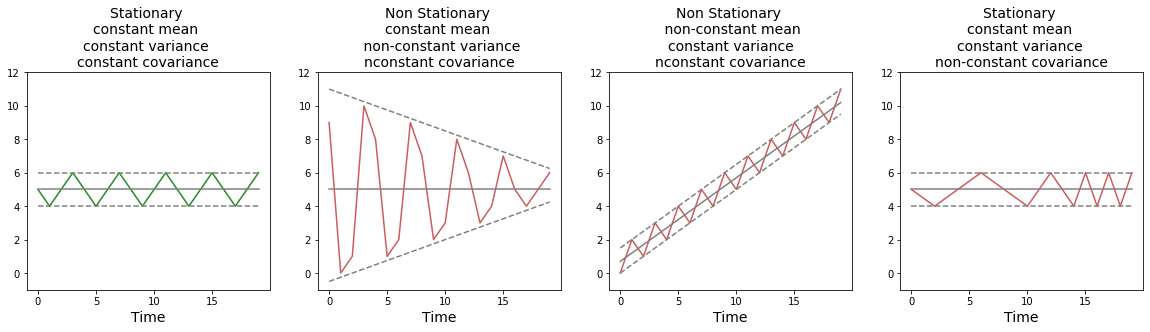

In [11]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='forestgreen')
sns.lineplot(x=t, y=5, ax=ax[0], color='grey')
sns.lineplot(x=t, y=6, ax=ax[0], color='grey')
sns.lineplot(x=t, y=4, ax=ax[0], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=14)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='indianred' )
sns.lineplot(x=t, y=5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=14)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='indianred' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=14)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='indianred')
sns.lineplot(x=t, y=5, ax=ax[3], color='grey')
sns.lineplot(x=t, y=6, ax=ax[3], color='grey')
sns.lineplot(x=t, y=4, ax=ax[3], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

Ο έλεγχος της σταθερότητας μπορεί να γίνει μέσω τριών διαφορετικών προσεγγίσεων:

οπτικά: σχεδιάστε χρονοσειρές και ελέγξτε για τάσεις ή εποχικότητα

βασικά στατιστικά στοιχεία: διαίρεση χρονοσειρών και σύγκριση του μέσου όρου και της διακύμανσης κάθε διαμερίσματος

στατιστική δοκιμή: επαυξημένη δοκιμή Dickey Fuller

Αv κάνουμε πρώτα τον οπτικό έλεγχο 

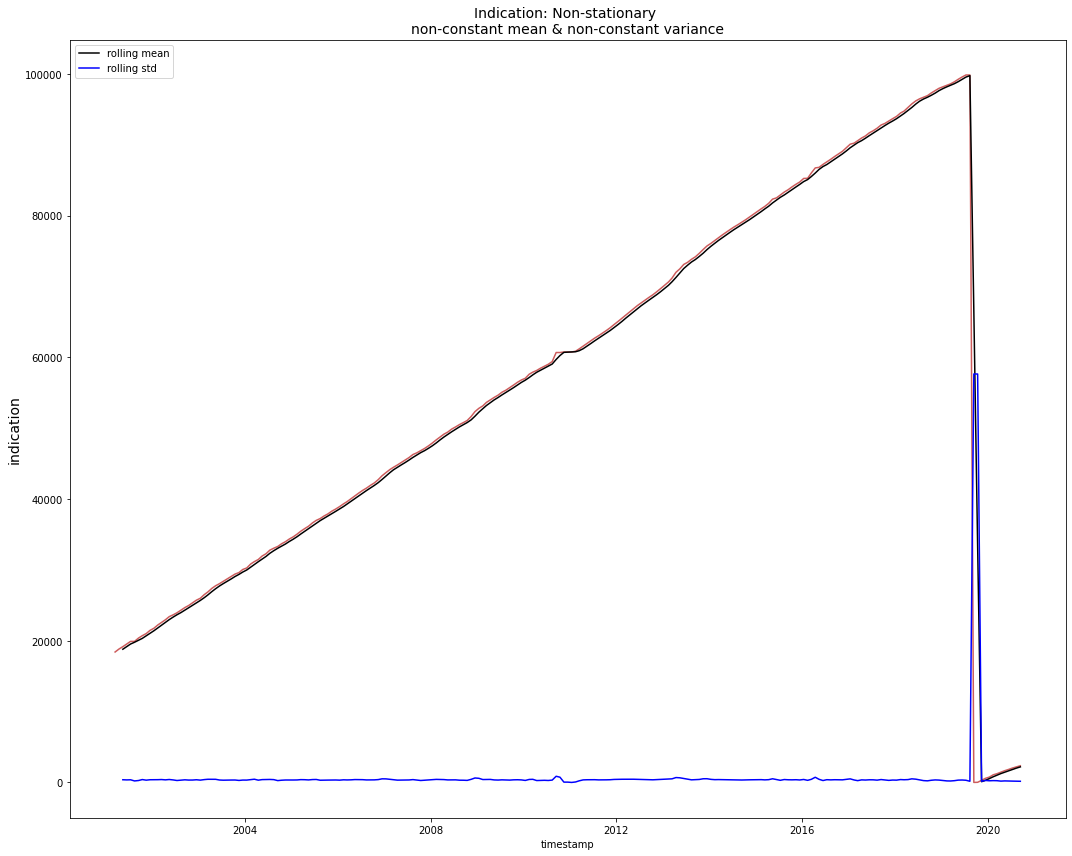

In [50]:
rolling_window = 3
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.timestamp, y=df.indication, ax=ax, color='indianred')
sns.lineplot(x=df.timestamp, y=df.indication.rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')
sns.lineplot(x=df.timestamp, y=df.indication.rolling(rolling_window).std(), ax=ax, color='blue', label='rolling std')
ax.set_title('Indication: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax.set_ylabel(ylabel='indication', fontsize=14)
plt.tight_layout()
plt.show()

Στη συνέχεια, θα ελέγξουμε τα υποκείμενα στατιστικά στοιχεία. Για αυτό θα χωρίσουμε τις χρονοσειρές σε δύο ενότητες και θα ελέγξουμε τη μέση τιμή και τη διακύμανση. 

In [51]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

partition1_mean = df.head(partition_length).mean()
partition1_var = df.head(partition_length).var()
partition2_mean = df.tail(partition_length).mean()
partition2_var = df.tail(partition_length).var()

In [52]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition 1 Mean'] == temp['Partition 2 Mean'])
    m2 = (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    m3 = (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3)
    m4 = (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Partition 1 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Mean'])

    df1['Partition 1 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Variance'])

    return df1


stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")

,Partition 1 Mean,Partition 2 Mean,Partition 1 Variance,Partition 2 Variance
provision_id,"527,163","527,163",0,0
indication,"39,306","72,466","155,079,497","766,520,260"
meter_var_normal,1,1,0,0
meter_var_stop,0,0,0,0
provision_var_change,0,0,0,0
provision_var_normal,1,1,0,0


Απο τα αποτελέσματα βλέπουμε οτι οι τιμες του μετρητη ειναι nο-stationary

Ας αξιολογήσουμε τα ιστογράμματα. Δεδομένου ότι εξετάζουμε τη μέση τιμή και τη διακύμανση, αναμένουμε ότι τα δεδομένα συμμορφώνονται με μια κατανομή Gaussian (διανομή σε σχήμα καμπάνας) σε περίπτωση στάσης.

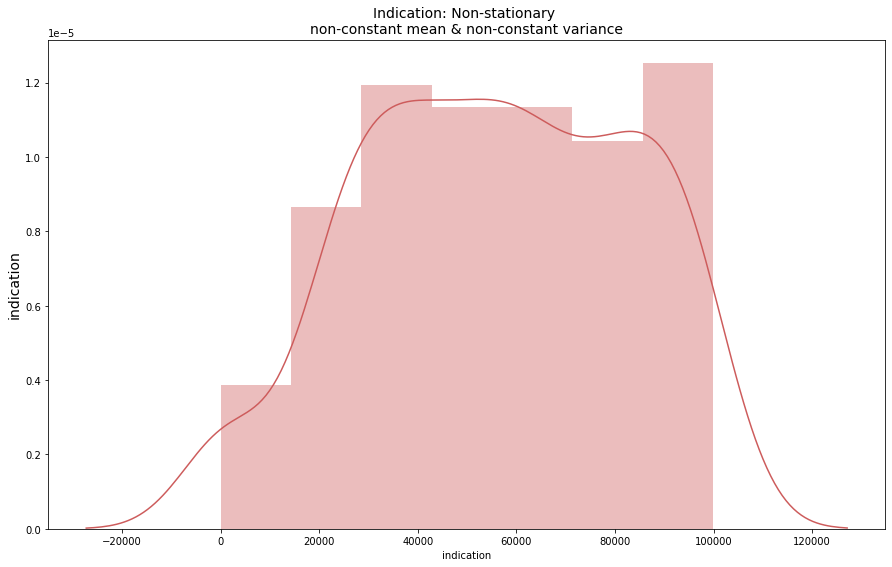

In [53]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

sns.distplot(df.indication.fillna(np.inf), ax=ax, color='indianred')
ax.set_title('Indication: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax.set_ylabel(ylabel='indication', fontsize=14)

plt.show()

ο τεστ Augmented Dickey-Fuller (ADF) είναι ένας τύπος στατιστικού τεστ που ονομάζεται unit root test. Unit roots είναι αιτία για μη στασιμότητα.

Null Hypothesis (H0): Οι χρονοσειρές έχουν μια Unit root. (Οι χρονοσειρές δεν είναι σταθερές).

Εναλλακτική υπόθεση (H1): Οι χρονοσειρές δεν έχουν Unit root (Οι χρονοσειρές είναι στάσιμες).

Εάν η μηδενική υπόθεση μπορεί να απορριφθεί, μπορούμε να συμπεράνουμε ότι οι χρονοσειρές είναι σταθερές.

Υπάρχουν δύο τρόποι απόρριψης της μηδενικής υπόθεσης:

Αφενός, η μηδενική υπόθεση μπορεί να απορριφθεί εάν η τιμή p είναι κάτω από ένα καθορισμένο επίπεδο σημασίας. Το προεπιλεγμένο επίπεδο σημασίας είναι 5%

** p-value> επίπεδο σημασίας (προεπιλογή: 0,05) **: Αποτυχία απόρριψης της μηδενικής υπόθεσης (H0), τα δεδομένα έχουν ρίζα μονάδας και είναι μη στάσιμα.
** p-value <= επίπεδο σημασίας (προεπιλογή: 0,05) **: Απόρριψη της μηδενικής υπόθεσης (H0), τα δεδομένα δεν έχουν ρίζα μονάδας και είναι στάσιμα.
Από την άλλη πλευρά, η μηδενική υπόθεση μπορεί να απορριφθεί εάν το στατιστικό στοιχείο δοκιμής είναι μικρότερο από την κρίσιμη τιμή.

In [54]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.indication.values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

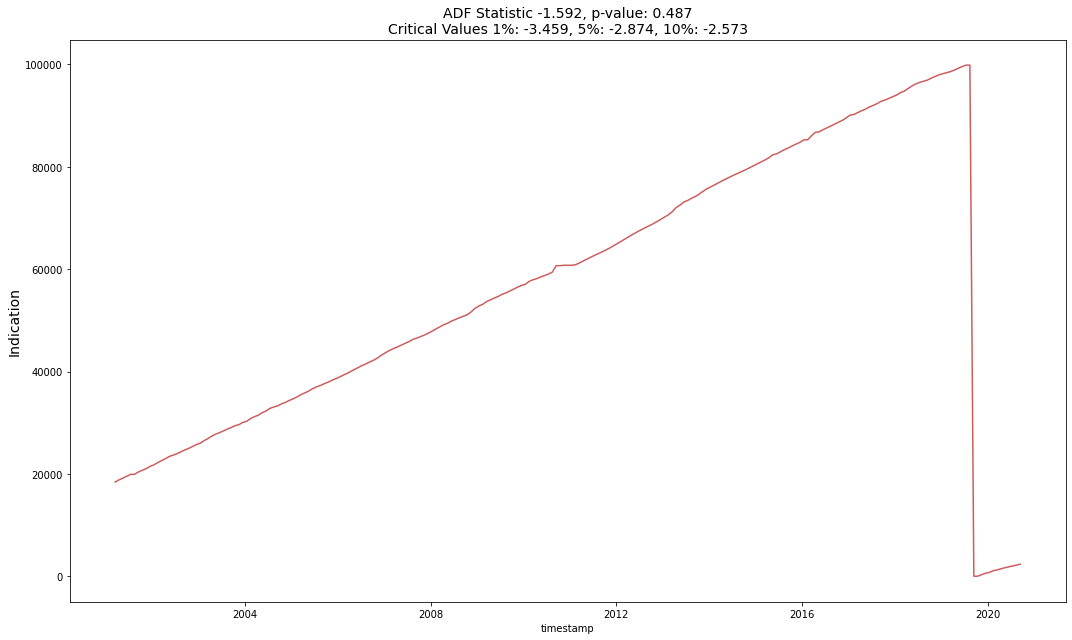

In [55]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.timestamp, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df.indication.values, 'Indication', ax)



plt.tight_layout()
plt.show()

Επειδή  τα δεδομένα δεν είναι στατικά αλλά θέλουμε να χρησιμοποιήσουμε ένα μοντέλο που απαιτεί να είναι, τα δεδομένα πρέπει να μετατραπούν. Ωστόσο, εάν τα δεδομένα δεν είναι στάσιμα αρχικά, θα πρέπει να επανεξετάσουμε την επιλογή του μοντέλου.

Οι δύο πιο κοινές μέθοδοι για την επίτευξη σταθερότητας είναι:

Μετασχηματισμός: π.χ. log ή τετραγωνική ρίζα για σταθεροποίηση μη σταθερής διακύμανσης

Διαφορά: αφαιρεί την τρέχουσα τιμή από την προηγούμενη

In [56]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['indication_log'] = np.log(abs(df.indication))
# list of values of 'Marks' column 
marks_list = df['indication_log'].tolist() 
  
# show the list 
print(marks_list)




[9.820431977398803, 9.843259726985641, 9.860632242229698, 9.880270101359944, 9.89877647280601, 9.89877647280601, 9.921818509220852, 9.93837195438963, 9.952753793839046, 9.973992613421482, 9.988104398256008, 10.009242990201992, 10.024598378285186, 10.041378179875572, 10.060363087998608, 10.071372061532314, 10.083389517811316, 10.098519653689262, 10.11366743745848, 10.125470430529585, 10.140573455973044, 10.155179687254753, 10.16569795901424, 10.185315020186113, 10.199100591564108, 10.21756809884244, 10.231171283124262, 10.241993434184533, 10.253686572872523, 10.265523102716957, 10.277152348094495, 10.288954014137602, 10.296238848224217, 10.31088412749404, 10.317846327814411, 10.336081328032545, 10.34705094924295, 10.35656753125214, 10.37195875822042, 10.382234100838373, 10.39772637269772, 10.406109618951431, 10.413312675968536, 10.424659468356262, 10.433556823868823, 10.444444630081449, 10.453456963419745, 10.46458795217574, 10.475934947858288, 10.486289592589621, 10.4955981889183, 10.5

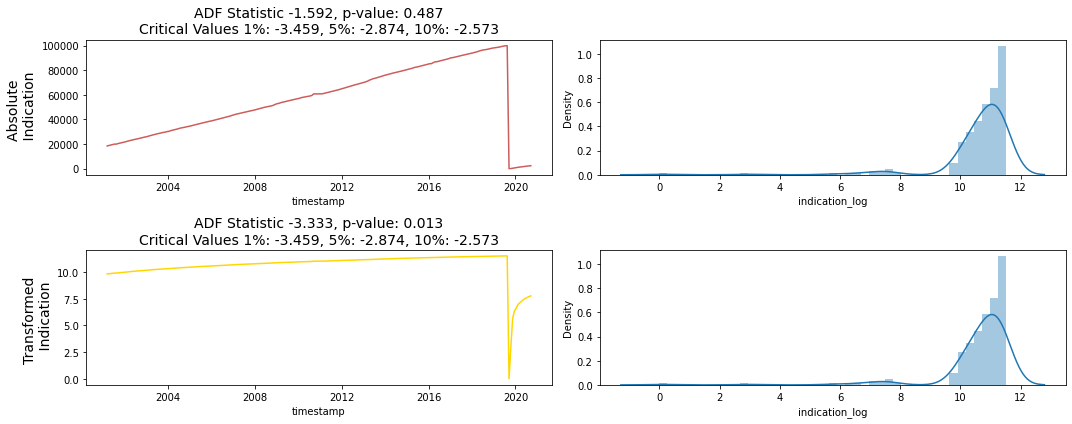

In [57]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
visualize_adfuller_results(abs(df.indication),'Absolute \n Indication', ax[0, 0])

sns.distplot(df.indication_log, ax=ax[0,1])

visualize_adfuller_results(df.indication_log, 'Transformed \n Indication', ax[1,0])
sns.distplot(df.indication_log, ax=ax[1,1])

plt.tight_layout()
plt.show()

Η διαφοροποίηση μπορεί να γίνει με 2 τρόπους

Διαφορά πρώτης τάξης: γραμμικές τάσεις με 𝑧𝑖 = 𝑦𝑖 − 𝑦𝑖 − 1

Διαφορά δεύτερης τάξης: τετραγωνικές τάσεις με
 
 𝑧𝑖 = (𝑦𝑖 − 𝑦𝑖 − 1) - (𝑦𝑖-1 − 𝑦𝑖 −2)

In [58]:
# First Order Differencing
ts_diff = np.diff(df.indication)
df['indication_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df.indication_diff_1)
df['indication_diff_2'] = np.append([0], ts_diff)

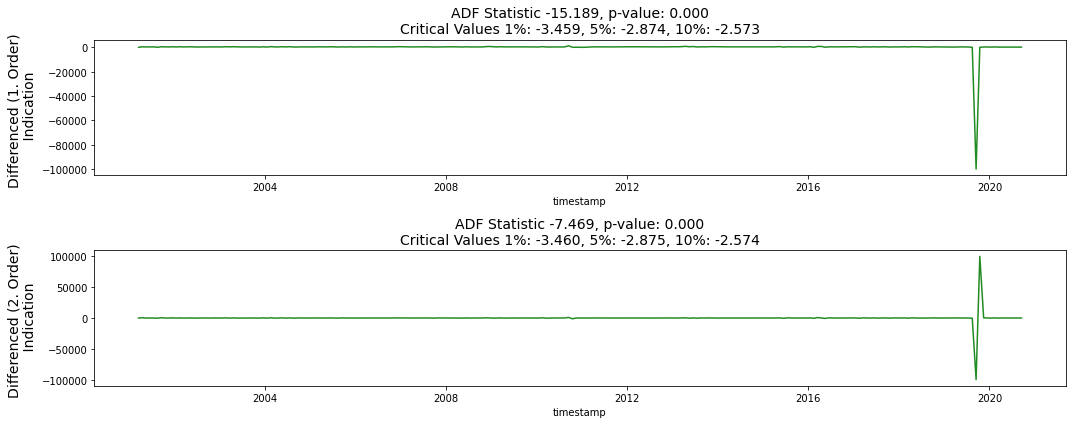

In [59]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

visualize_adfuller_results(df.indication_diff_1, 'Differenced (1. Order) \n Indication', ax[0])
visualize_adfuller_results(df.indication_diff_2, 'Differenced (2. Order) \n Indication', ax[1])
plt.tight_layout()
plt.show()

Η διαφοροποίηση μπορεί να αντιστραφεί εάν είναι γνωστή η πρώτη τιμή πριν από τη αλλαγή. Σε αυτήν την περίπτωση, μπορούμε να συγκεντρώσουμε όλες τις τιμές με τη συνάρτηση .cumsum () και να προσθέσουμε την πρώτη τιμή των αρχικών χρονοσειρών.

In [60]:
df.indication.equals(df.indication_diff_1.cumsum() + df.indication.iloc[0])

True

# Feature Engineering

Time Features

In [61]:
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['day'] = pd.DatetimeIndex(df['timestamp']).day
df['day_of_year'] = pd.DatetimeIndex(df['timestamp']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['timestamp']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['timestamp']).quarter
df['season'] = df.month%12 // 3 + 1

df[['timestamp', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,timestamp,year,month,day,day_of_year,week_of_year,quarter,season
0,2001-03-15,2001,3,15,74,11,1,2
1,2001-04-15,2001,4,15,105,15,2,2
2,2001-05-15,2001,5,15,135,20,2,2
3,2001-06-15,2001,6,15,166,24,2,3
4,2001-07-15,2001,7,15,196,28,3,3


Encoding Cyclical Features

Τα νέα χαρακτηριστικά του χρόνου είναι κυκλικά. Για παράδειγμα, το χαρακτηριστικό μήνα κυμαίνεται μεταξύ 1 και 12 για κάθε έτος. Ενώ η διαφορά μεταξύ κάθε μήνα αυξάνεται κατά 1 κατά τη διάρκεια του έτους, μεταξύ δύο ετών το χαρακτηριστικό του μήνα αυξάνεται από 12 (Δεκέμβριος) σε 1 (Ιανουάριος). Αυτό έχει ως αποτέλεσμα τη διαφορά -11, η οποία μπορεί να προκαλέσει σύγχυση σε πολλά μοντέλα.

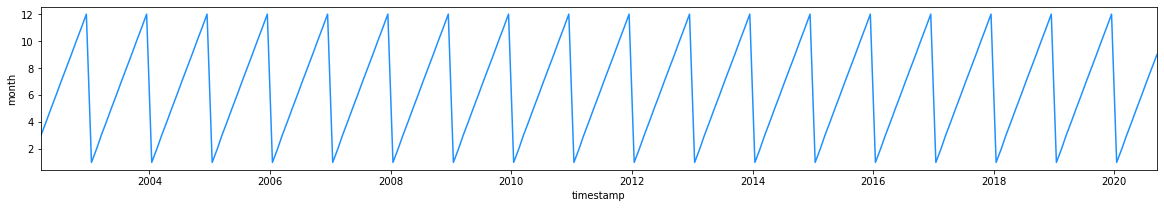

In [62]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df.timestamp, y=df.month, color='dodgerblue')
ax.set_xlim([date(2002, 3, 15), date(2020, 9, 15)])
plt.show()

Στην ιδανική περίπτωση, θέλουμε τα υποκείμενα δεδομένα να αντιπροσωπεύουν την ίδια διαφορά μεταξύ δύο διαδοχικών μηνών, ακόμη και μεταξύ Δεκεμβρίου και Ιανουαρίου. Μια κοινή λύση για αυτό το ζήτημα είναι η κωδικοποίηση κυκλικών χαρακτηριστικών σε δύο διαστάσεις με μετασχηματισμό ημιτονου και συνημιτόνου

In [63]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df.month/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df.month/month_in_year)

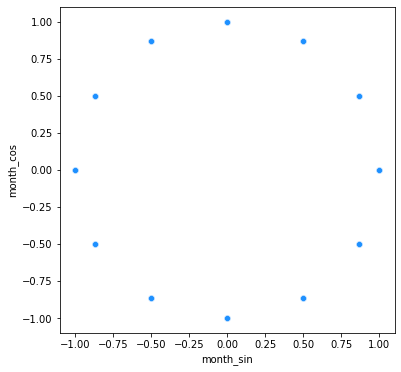

In [64]:
days_in_month = 30
df['day_sin'] = np.sin(2*np.pi*df.day/days_in_month)
df['day_cos'] = np.cos(2*np.pi*df.day/days_in_month)

days_in_year = 365
df['day_of_year_sin'] = np.sin(2*np.pi*df.day_of_year/days_in_year)
df['day_of_year_cos'] = np.cos(2*np.pi*df.day_of_year/days_in_year)

weeks_in_year = 52.1429
df['week_of_year_sin'] = np.sin(2*np.pi*df.week_of_year/weeks_in_year)
df['week_of_year_cos'] = np.cos(2*np.pi*df.week_of_year/weeks_in_year)

quarters_in_year = 4
df['quarter_sin'] = np.sin(2*np.pi*df.quarter/quarters_in_year)
df['quarter_cos'] = np.cos(2*np.pi*df.quarter/quarters_in_year)

seasons_in_year = 4
df['season_sin'] = np.sin(2*np.pi*df.season/seasons_in_year)
df['season_cos'] = np.cos(2*np.pi*df.season/seasons_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

# Αποσύνθεση

Τα χαρακτηριστικά μιας χρονοσειράς είναι

Τάση και επίπεδο

Εποχικότητα

Τυχαιότητα / θόρυβος

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση seasonal_decompose () από τη βιβλιοθήκη statsmodels.

Πρόσθετο: 𝑦 (𝑡) = 𝐿𝑒𝑣𝑒𝑙 + 𝑇𝑟𝑒𝑛𝑑 + 𝑆𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦 + 𝑁𝑜𝑖𝑠𝑒
Πολλαπλασιαστικό: 𝑦 (𝑡) = 𝐿𝑒𝑣𝑒𝑙 ∗ 𝑇𝑟𝑒𝑛𝑑 ∗ 𝑆𝑒𝑎𝑠𝑜𝑛𝑎𝑙𝑖𝑡𝑦 ∗ 𝑁𝑜𝑖𝑠𝑒

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['indication']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], freq=3, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

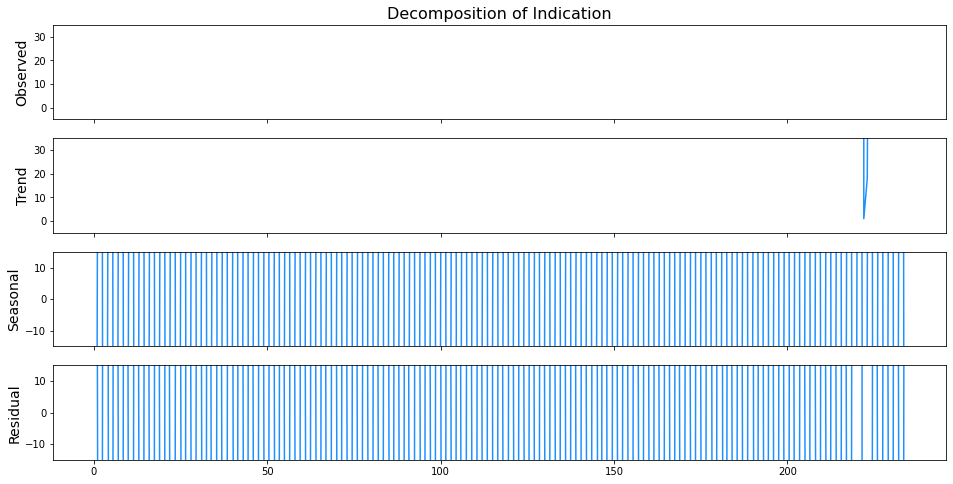

In [66]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df.indication, freq=3, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of Indication', fontsize=16)
res.observed.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)
ax[0].set_ylim([-5, 35])

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)
ax[1].set_ylim([-5, 35])

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)
ax[2].set_ylim([-15, 15])

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)
ax[3].set_ylim([-15, 15])


plt.show()

In [67]:
df[['indication', 'indication_trend', 'indication_seasonal']].head()\
.style.set_properties(subset=[ 'indication_trend', 'indication_seasonal'
                             ], **{'background-color': 'dodgerblue'})

,indication,indication_trend,indication_seasonal
0,18406,18434.333333,-416.176674
1,18831,18799.333333,-1.556962
2,19161,19177.666667,417.733636
3,19541,19536.000000,-416.176674
4,19906,19784.333333,-1.556962


# Καθυστέρηση

.shift()

In [68]:
weeks_in_month = 4

df['indication_seasonal_shift_r_2M'] = df.indication_seasonal.shift(-2*weeks_in_month)
df['indication_seasonal_shift_r_1M'] = df.indication_seasonal.shift(-1*weeks_in_month)
df['indication_seasonal_shift_1M'] = df.indication_seasonal.shift(1*weeks_in_month)
df['indication_seasonal_shift_2M'] = df.indication_seasonal.shift(2*weeks_in_month)
df['indication_seasonal_shift_3M'] = df.indication_seasonal.shift(3*weeks_in_month)

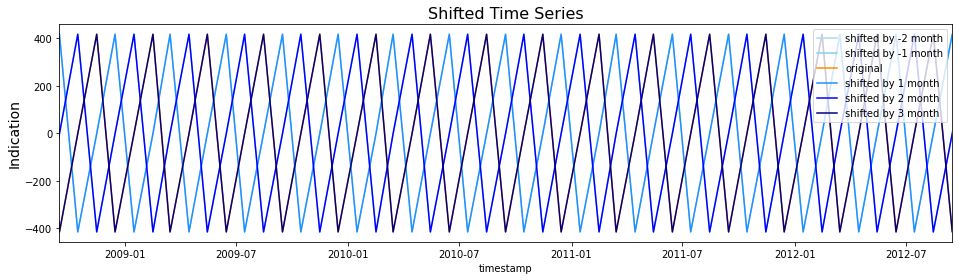

In [69]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_r_2M, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_r_1M, label='shifted by -1 month', ax=ax, color='skyblue')

sns.lineplot(x=df.timestamp, y=df.indication_seasonal, label='original', ax=ax, color='darkorange')

sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_1M, label='shifted by 1 month', ax=ax, color='dodgerblue')
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_2M, label='shifted by 2 month', ax=ax, color='blue')
sns.lineplot(x=df.timestamp, y=df.indication_seasonal_shift_3M, label='shifted by 3 month', ax=ax, color='navy')

ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2008, 9, 15), date(2012, 9, 15)])
ax.set_ylabel(ylabel='Indication', fontsize=14)

plt.show()

# Διερευνητική ανάλυση Δεδομένων

Παρακάτω κανουμε απεικόνιση τα εποχιακά στοιχεία κάθε δυνατότητας και συγκρίνοντας τα ελάχιστα και τα μέγιστα. Κάνοντας αυτό, μπορούμε ήδη να αποκτήσουμε κάποιες πληροφορίες:

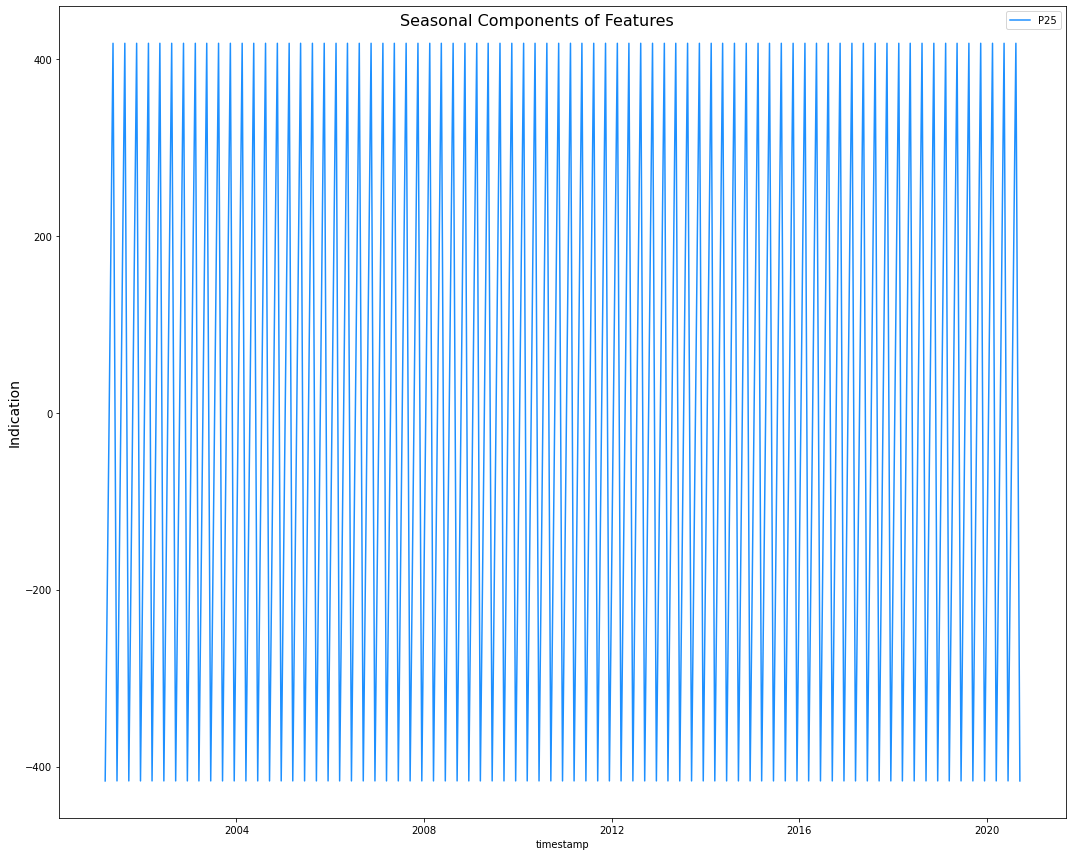

In [70]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.timestamp, y=df.indication_seasonal,ax=ax,  color='dodgerblue', label='P25')
ax.set_ylabel(ylabel='Indication', fontsize=14)

plt.tight_layout()
plt.show()

Μπορούμε να δούμε ότι η συσχέτιση με τις κατηγορικές μεταβλητές  παραμένει ίδια εάν χρησιμοποιούμε τις χρονικά μετατοπισμένες δυνατότητες σε σύγκριση με τις αρχικές δυνατότητες.

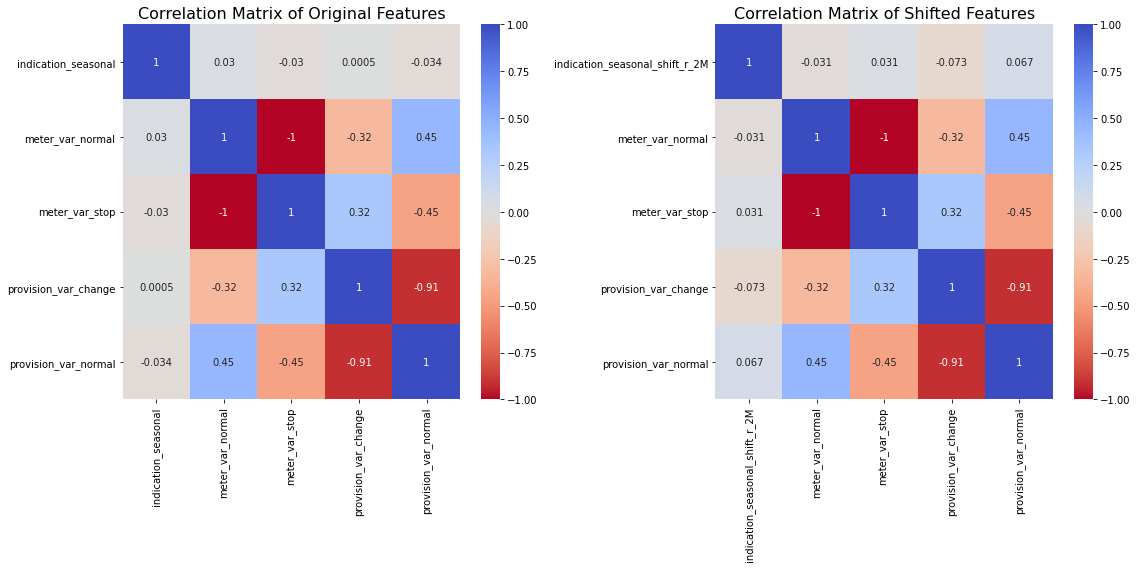

In [71]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

original_cols = ['indication_seasonal','meter_var_normal', 'meter_var_stop', 'provision_var_change','provision_var_normal' 
                 ]

corrmat = df[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Original Features', fontsize=16)

shifted_cols = [ 'indication_seasonal_shift_r_2M','meter_var_normal', 'meter_var_stop', 'provision_var_change','provision_var_normal' 
                ]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()

# Ανάλυση Αυτοσυσχέτισης

Αυτό το βήμα EDA είναι ιδιαίτερα σημαντικό όταν χρησιμοποιείτε το ARIMA. Η ανάλυση αυτοσυσχέτισης βοηθά στον προσδιορισμό των παραμέτρων AR και MA για το μοντέλο ARIMA.

Λειτουργία αυτοσυσχέτισης (ACF) και λειτουργία μερικής αυτοσυσχέτισης (PACF)

Λειτουργία αυτόματης συσχέτισης (ACF): Συσχέτιση μεταξύ χρονοσειρών με μια καθυστερημένη έκδοση. Η συνάρτηση αυτοσυσχέτισης ξεκινά μια υστέρηση 0, η οποία είναι η συσχέτιση των χρονοσειρών με τον εαυτό της και συνεπώς οδηγεί σε συσχέτιση 1 -> Η παράμετρος MA είναι q σημαντικής καθυστέρησεις.

Λειτουργία μερικής αυτοσυσχέτισης (PACF): Πρόσθετος συσχετισμός που εξηγείται από κάθε διαδοχικό όρο καθυστέρησης -> Η παράμετρος AR είναι p σημαντικής καθυστέρησεις
Η αυτόματη συσχέτιση βοηθά στον εντοπισμό της εποχικότητας.


Όπως μπορούμε να συμπεράνουμε από το παραπάνω γράφημα, η αυτοσυσχέτιση παραμένει σταθερή  καθώς η καθυστέρηση αυξάνεται, επιβεβαιώνοντας ότι  υπάρχει γραμμική σχέση μεταξύ των παρατηρήσεων που διαχωρίζονται από μεγαλύτερες καθυστερήσεις.



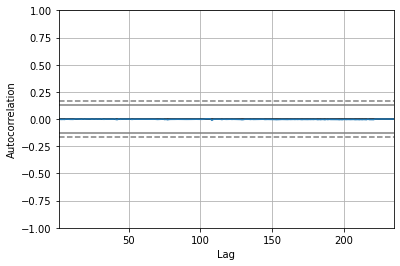

In [72]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.indication_diff_1)
plt.show()

Δεν μπορούμε να δούμε κάποιο ημιτονοειδές σχήμα και στις λειτουργίες ACF και PACF. Αυτό υποδηλώνει ότι δεν υπάρχουν οι δύο διαδικασίες AR και MA.

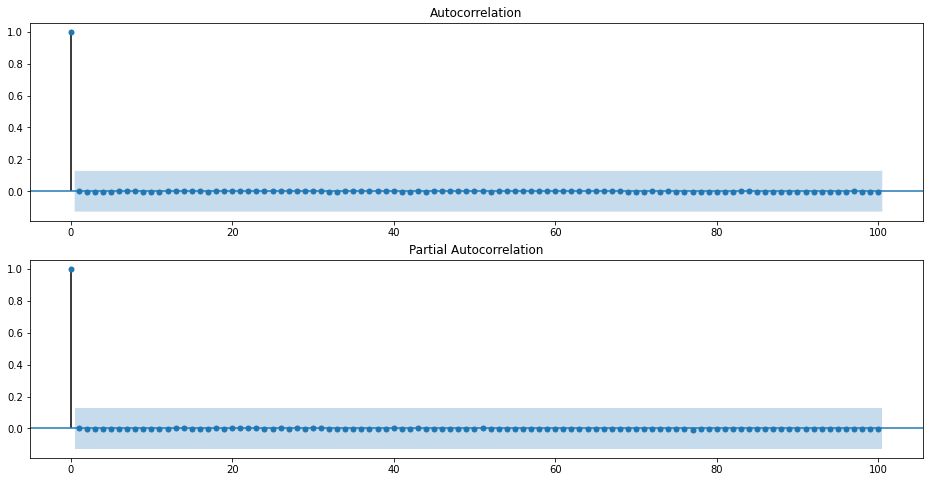

In [73]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.indication_diff_1,lags=100, ax=ax[0])
plot_pacf(df.indication_diff_1,lags=100, ax=ax[1])
plt.show()

# Cross Validation

Για cross validation ,  χρησιμοποιήσετε η βιβλιοθήκη Split Time Series Στην πρόβλεψη χρονοσειρών

In [74]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.timestamp
y = df.indication

folds = TimeSeriesSplit(n_splits=N_SPLITS)

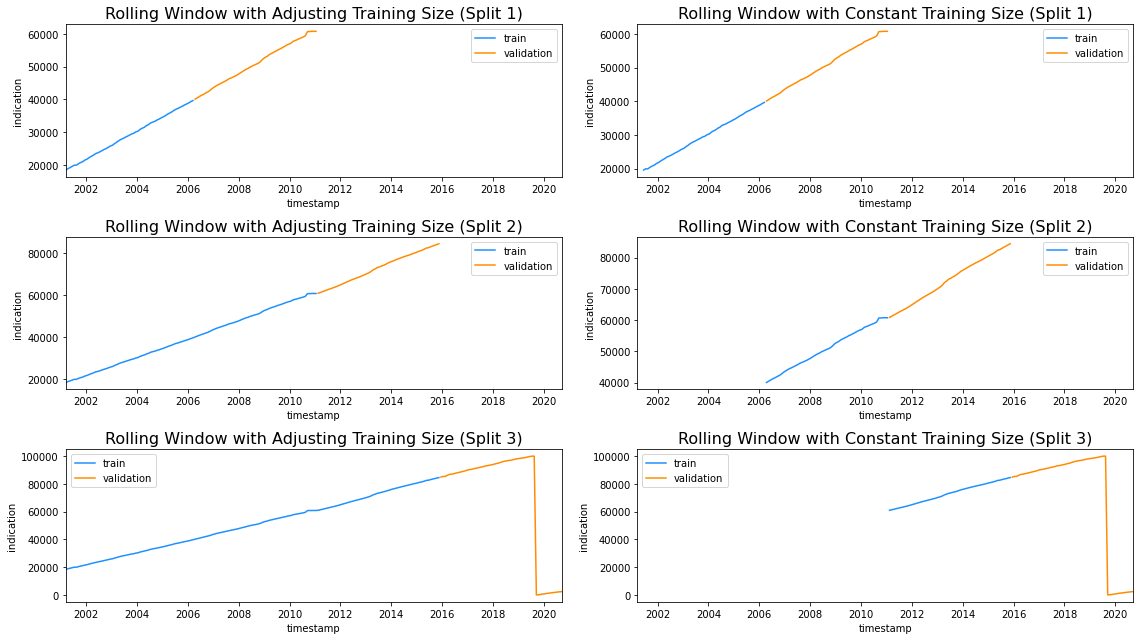

In [75]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2001, 3, 15), date(2020, 9, 15)])
    ax[i, 1].set_xlim([date(2001, 3, 15), date(2020, 9, 15)])
plt.tight_layout()
plt.show()

# Μοντέλα

Οι χρονοσειρές μπορούν να είναι είτε univariate είτε multivariate:

Οι χρονοσειρές Univariate έχουν μόνο μία μεταβλητή που εξαρτάται από το χρόνο.
Οι χρονοσειρές multivariate έχουν πολλαπλές μεταβλητή που εξαρτώνται από το χρόνο.
Το παράδειγμά μας είναι αρχικά είανι μια σειρά πολλαπλών μεταβλήτων  επειδή έχει πολλές μεαβλητές  που εξαρτώνται από το χρόνο. Ωστόσο, κοιτάζοντας μόνο τη μεταβλητή στόχου indication μπορούμε να τη μετατρέψουμε σε μονομεταβλητή χρονοσειρά

Θα επικεντρωθούμε σε τριμηνιαίες προβλέψεις. Θα χρησιμοποιήσουμε το Q2 2020 ως δεδομένα δοκιμής και τα υπόλοιπα δεδομένα θα διαιρεθούν ανά τρίμηνο για διασταυρούμενη επικύρωση.

Θα αξιολογήσουμε το μέσο απόλυτο σφάλμα (MAE) και το Root Mean Square Error (RMSE) των μοντέλων. Για τις μετρήσεις είναι καλύτερες όσο μικρότερες είναι.

# Μοντέλα για Univariate Time Series

Stochastic Models

*   Naive Approach
*   Moving Average
*   Exponential Smoothing
*   ARIMA
*   Prophet

Deep Learning

*   LSTM
*   GRU







In [76]:
df['quarter_idx'] = (df.quarter != df.quarter.shift(1)).cumsum()

target = 'indication'
features = ['timestamp']

N_SPLITS = 78

X = df[df.quarter_idx < N_SPLITS][features]
y = df[df.quarter_idx < N_SPLITS][target]

X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

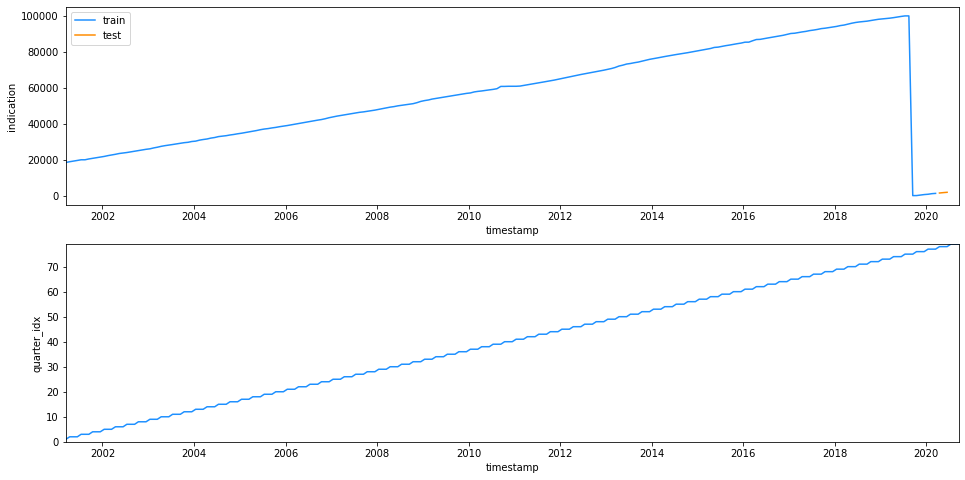

In [77]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.timestamp, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.timestamp, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.timestamp, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2001, 3, 15), date(2020, 9, 15)])
ax[1].set_xlim([date(2001, 3, 15), date(2020, 9, 15)])
ax[1].set_ylim([0, N_SPLITS+1])


plt.show()

# Naive Approach


𝑦̂ 𝑡+1=𝑦𝑡

In [91]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.timestamp, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.timestamp, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.timestamp, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2018, 3, 15), date(2020, 9, 15)])
    ax[0].set_ylim([0, 2000])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Indication P25', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([100, 2000])   
    plt.show()

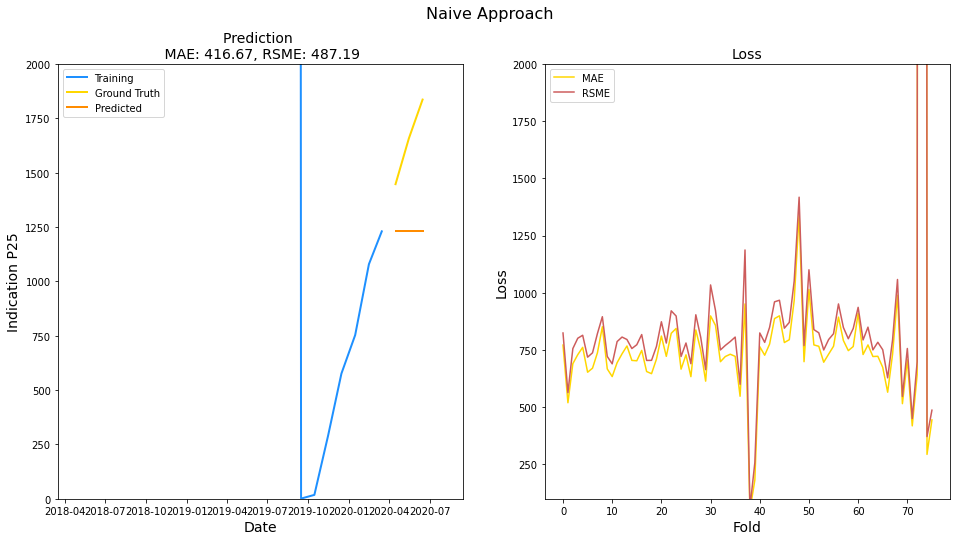

In [92]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')

# Moving Average

In [93]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach    
    for i in range(len(y_valid_pred)):
        y_valid_pred.iloc[i] = y_train.append(y_valid_pred.iloc[:(i)]).reset_index(drop=True).rolling(3).mean().iloc[-1]
        
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.zeros(len(X_test)))

for i in range(len(y_pred)):
    y_pred.iloc[i] = y.append(y_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Moving Average (Window = 3 Months)')

ValueError: ignored